# Product
가게의 간판사진을 가게 이름으로 바꿔주는 서비스를 만들어보자

## 1. keras OCR API

In [33]:
import matplotlib.pyplot as plt
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [34]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
    'https://cdn.sisamagazine.co.kr/news/photo/202012/337389_341672_5619.jpeg',
    'https://cdn.notefolio.net/img/61/43/614323c1cc1ccd1d1f2108fa8fe49e59dc236781fd197ea284b364ca591fd3ca_v1.jpg',
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTtg2VyBCoXddi5c0CUtiw7Vz60-UOy6XXP-A&usqp=CAU'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


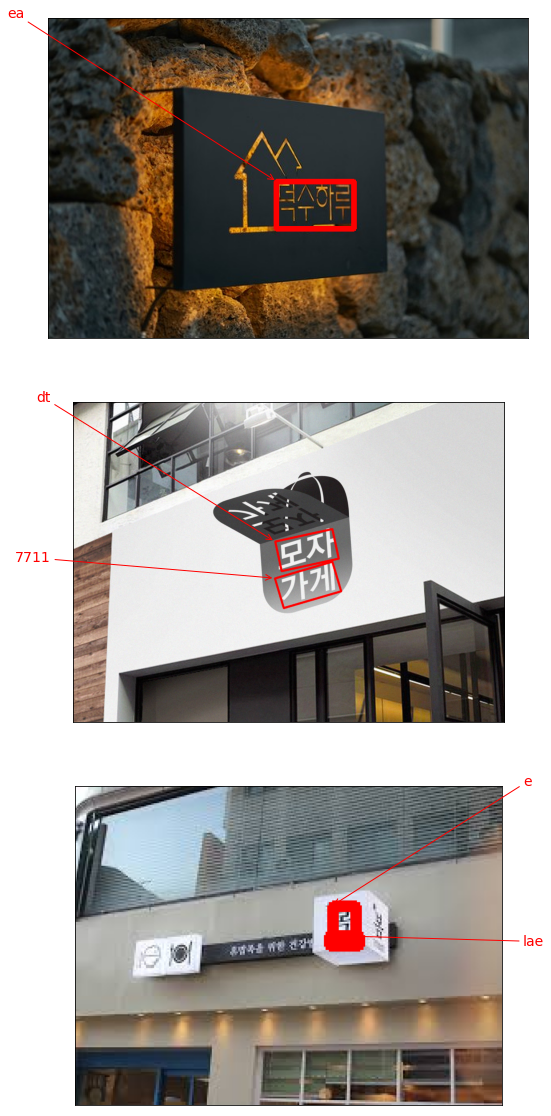

In [35]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 2. tesseract

In [36]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list



In [37]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [42]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_paths = [
    work_dir + '/data/test1.jpg',
    #work_dir + '/data/test2.jpg',
    work_dir + '/data/test3.jpg',   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 
]


In [52]:
import cv2
'''
for img_file_path in img_file_paths:
    cropped_image_path_list = crop_word_regions(img_file_path, work_dir + '/output')
    recognize_images(cropped_image_path_list)
    for path in cropped_image_path_list:
        img = cv2.imread(path)
        plt.imshow(img)
'''

"\nfor img_file_path in img_file_paths:\n    cropped_image_path_list = crop_word_regions(img_file_path, work_dir + '/output')\n    recognize_images(cropped_image_path_list)\n    for path in cropped_image_path_list:\n        img = cv2.imread(path)\n        plt.imshow(img)\n"

/aiffel/aiffel/ocr_python/output/0000.png

Done


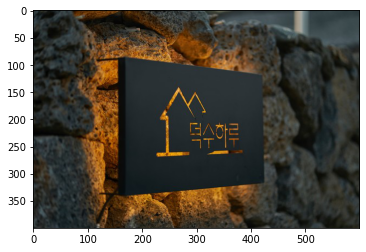

In [50]:
cropped_image_path_list = crop_word_regions(img_file_paths[0], work_dir + '/output')
recognize_images(cropped_image_path_list)
for path in cropped_image_path_list:
    img = cv2.imread(path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

/aiffel/aiffel/ocr_python/output/0000.png
 @ …"

Done


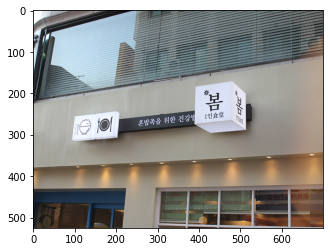

In [51]:
cropped_image_path_list = crop_word_regions(img_file_paths[1], work_dir + '/output')
recognize_images(cropped_image_path_list)
for path in cropped_image_path_list:
    img = cv2.imread(path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))